In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import colors as c
import skimage.io as io
from sklearn.preprocessing import StandardScaler
import scipy.io.wavfile as wavfile
from scipy import signal
import soundfile as sf
import urllib
from bs4 import BeautifulSoup
from collections import Counter

#print out the average and deviation values of each colors of the RGB
def calculate_image(image):
    
    img = mpimg.imread(image)
    
    #split image by colors
    red = img[:, :, 0]
    green = img[:, :, 1]
    blue = img[:, :, 2]
    
    width = red.shape[0]
    height = red.shape[1]
    
    #calculating average and deviation values
    avg_red = np.average(red)
    avg_green = np.average(green)
    avg_blue = np.average(blue)
    
    std_red = np.std(red)
    std_green = np.std(green)
    std_blue = np.std(blue)
    
    print("Average Red: ", avg_red)
    print("Average Green: ", avg_green)
    print("Average Blue: ", avg_blue)
    
    print("Red Standard deviation:", std_red)
    print("Green Standard deviation:", std_green)
    print("Blue Standard deviation:", std_blue)
    

#print out the standardized values of each colors of the RGB 
def standardize(image):
    img = mpimg.imread(image)
    red = img[:, :, 0]
    green = img[:, :, 1]
    blue = img[:, :, 2]
    
    print("Standardized values", end="\n\n")
    
    s_red = normalize(red)
    s_green = normalize(green)
    s_blue = normalize(blue)
    
    fig, (ax1, ax2, ax3) = plt.subplots(1,3,constrained_layout=True, figsize=(15,5))
    
    print("Red mean: ", np.mean(s_red))
    print("Red deviation: ",np.std(s_red), end="\n\n")
    ax1.plot(s_red, s_red, 'o', color='red', markersize=0.1);
    
    print("Green mean: ", np.mean(s_green))
    print("Green deviation: ",np.std(s_green), end="\n\n")
    ax2.plot(s_green, s_green, 'o', color='green', markersize=0.1);
    
    print("Blue mean: ", np.mean(s_blue))
    print("Blue deviation: ",np.std(s_blue))
    ax3.plot(s_blue, s_blue, 'o', color='blue', markersize=0.1);
    
    plt.show()


#calculate the standardized value of a 2D array
def normalize(x):
    mean = np.average(x)
    std = np.std(x)   
    for idx, val in enumerate(x):
        for idy, valy in enumerate(val):
            x[idx][idy] = (x[idx][idy]-mean)/std
    return x
    
    

#prints the image, histogram of each colors of the RGB, and the standardized values
def processImage(image):
    
    print('Image name: ', image)
    img = mpimg.imread(image)
    imgplot = plt.imshow(img)
    plt.show()
    calculate_image(image)
    # Split
    red = img[:, :, 0]
    green = img[:, :, 1]
    blue = img[:, :, 2]
    fig, (ax1, ax2, ax3) = plt.subplots(1,3,constrained_layout=True, figsize=(15,5))
    ax1.hist(red.ravel()*256, bins=50, color="red")
    ax1.set_title('red')
    
    ax2.hist(green.ravel()*256, bins=50, color="green")
    ax2.set_title('green')
    
    ax3.hist(blue.ravel()*256, bins=50, color="blue")
    ax3.set_title('blue')
    
    plt.show()
    
    standardize(image)





In [4]:
#prints out the spectogram of the given wav file
def soundSpectogram(fileName):
    print('File name: ', fileName)
    plotSound(fileName)
    
    sample_rate, samples = wavfile.read(fileName)
    print('Before Standardization')
    print('Average: ',np.average(samples))
    print('Deviation: ',np.std(samples))

    frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)
    z_min, z_max = -np.abs(spectrogram).max()/1000, np.abs(spectrogram).max()/1000
    cMap = c.ListedColormap(['r','b','y'])
    plt.pcolormesh(times, frequencies, spectrogram, shading='auto', cmap=cMap, vmin = z_min, vmax = z_max)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()
    
    scale=StandardScaler()
    samples = scale.fit_transform(samples.reshape(-1, 1)).flatten()
    print('After Standardization')
    print('Average: ',np.average(samples))
    print('Deviation: ',np.std(samples))
    
    frequencies2, times2, spectrogram2 = signal.spectrogram(samples, sample_rate)
    plt.pcolormesh(times2, frequencies2, spectrogram2, shading='auto', cmap=cMap, vmin = z_min, vmax = z_max)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()

#prints out the spectogram of the given wav file
def soundSpectogram2(fileName):
    
    print('File name: ', fileName)
    plotSound(fileName)
    
    data, rate = sf.read(fileName)
    print('Before Standardization')
    print('Average: ',np.average(data))
    print('Deviation: ',np.std(data))
    nchannels = data.ndim
    if nchannels == 1:
        pxx, freqs, bins, im = plt.specgram(data,256,rate)
    elif nchannels == 2:
        pxx, freqs, bins, im = plt.specgram(data[:,0],256,rate)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()
    
    
    scale=StandardScaler()
    data = scale.fit_transform(data.reshape(-1, 1)).flatten()
    print('After Standardization')
    print('Average: ',np.average(data))
    print('Deviation: ',np.std(data))
    nchannels = data.ndim
    if nchannels == 1:
        pxx, freqs, bins, im = plt.specgram(data,256,rate)
    elif nchannels == 2:
        pxx, freqs, bins, im = plt.specgram(data[:,0],256,rate)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()

def plotSound(fileName):
    sample_rate, data = wavfile.read(fileName)
    plt.plot(data[0:])
    plt.ylabel("Amplitude")
    plt.xlabel("Time")
    plt.show()
    
    



In [5]:
def ReadWeb(fileName):
    file = urllib.request.urlopen(fileName)
    myfile = file.read()
    soup = BeautifulSoup(myfile)
    c = Counter(soup.get_text().rstrip("\n"))
    plt.subplots(figsize=(18,5))
    plt.bar(*zip(*c.most_common()), width=0.5, color='g')
    plt.show()
    print(soup.get_text().rstrip("\n"))

    



Image name:  images/1.jpg


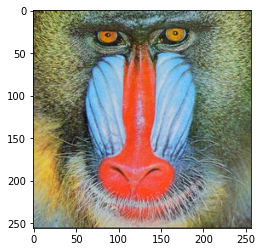

Average Red:  137.44248962402344
Average Green:  128.90579223632812
Average Blue:  113.12724304199219
Red Standard deviation: 53.44436594166184
Green Standard deviation: 43.07362739935737
Blue Standard deviation: 57.880672949003916


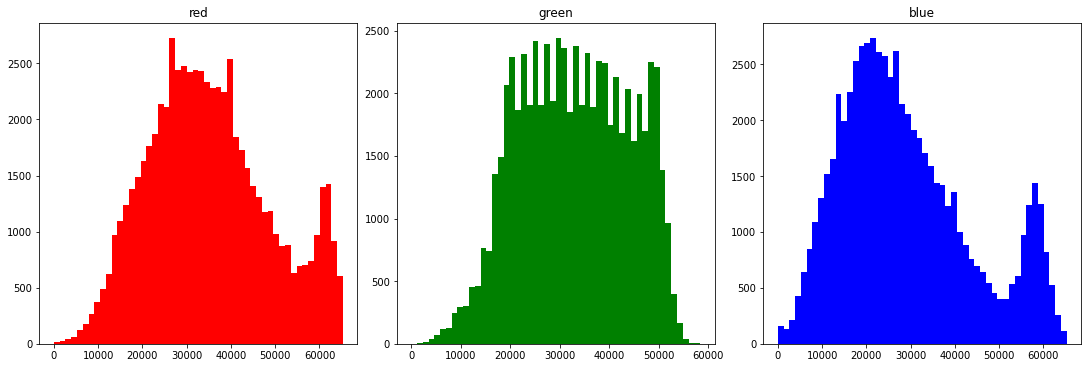

Standardized values

Red mean:  41.82191467285156
Red deviation:  94.14519233005647

Green mean:  47.78327941894531
Green deviation:  99.22163634747223

Blue mean:  38.46893310546875
Blue deviation:  90.96050811912536


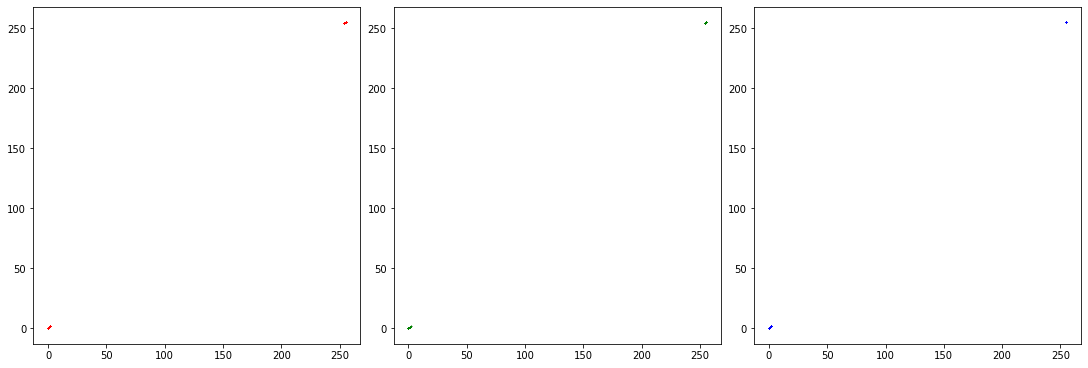

Image name:  images/2.jpg


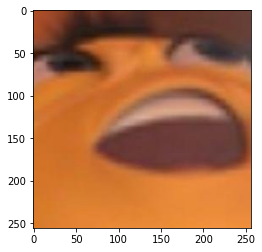

Average Red:  169.848388671875
Average Green:  98.75234985351562
Average Blue:  54.722625732421875
Red Standard deviation: 56.93210206421766
Green Standard deviation: 34.09098728094732
Blue Standard deviation: 19.89922114647678


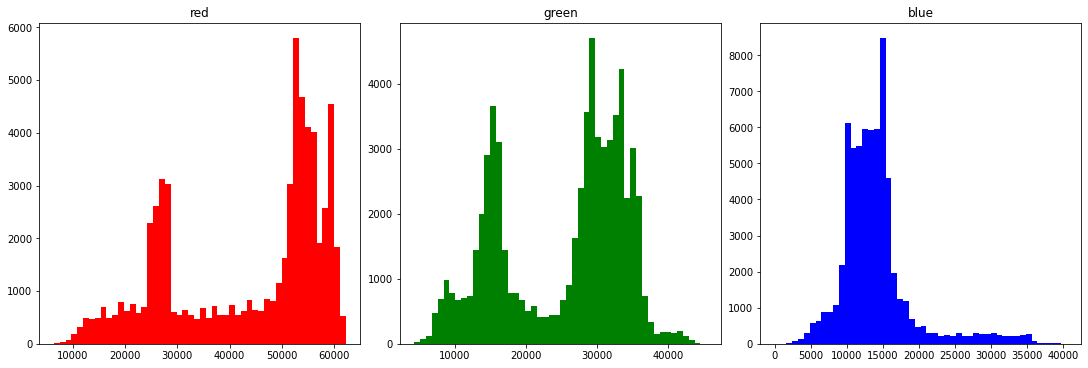

Standardized values

Red mean:  71.35731506347656
Red deviation:  114.29354754701569

Green mean:  71.62455749511719
Green deviation:  114.42355028231604

Blue mean:  18.162551879882812
Blue deviation:  65.2228916416488


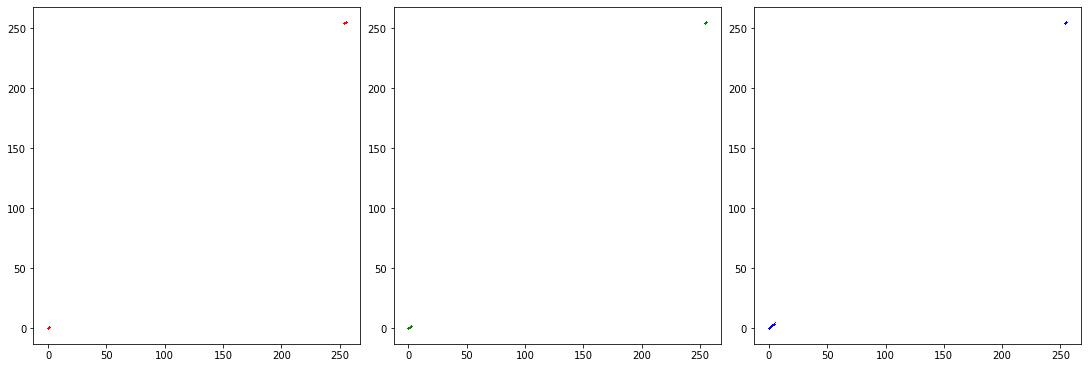

Image name:  images/3.jpg


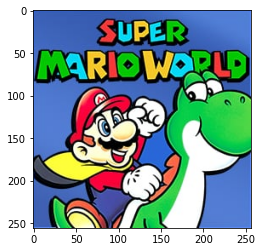

Average Red:  97.174560546875
Average Green:  131.57272338867188
Average Blue:  133.40203857421875
Red Standard deviation: 89.77517092439393
Green Standard deviation: 81.48990792355099
Blue Standard deviation: 86.76881095579279


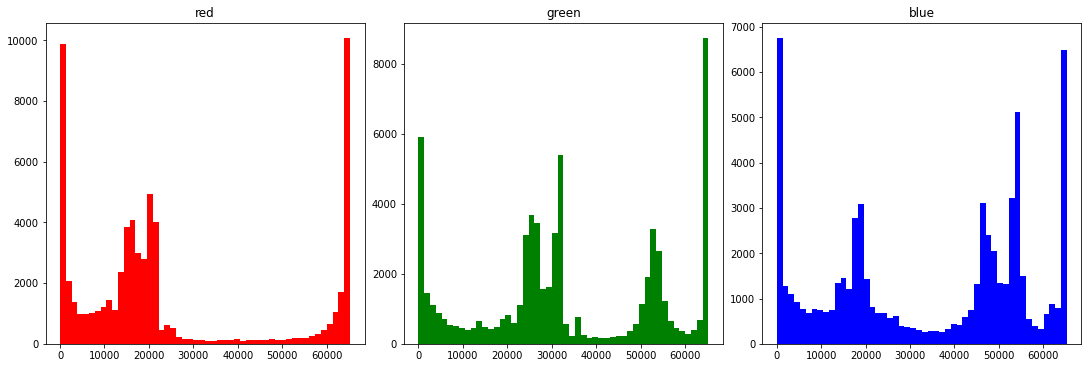

Standardized values

Red mean:  42.451629638671875
Red deviation:  94.67050827535884

Green mean:  48.45137023925781
Green deviation:  99.77966731827868

Blue mean:  53.93357849121094
Blue deviation:  103.94973757104172


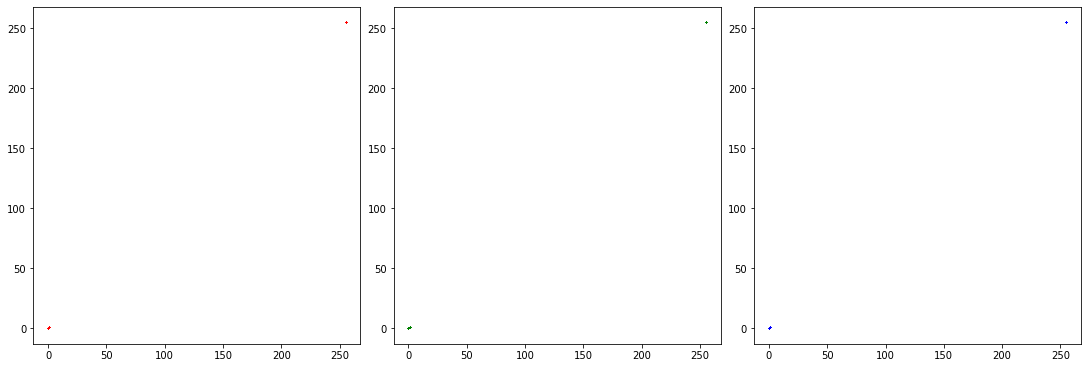

Image name:  images/4.jpg


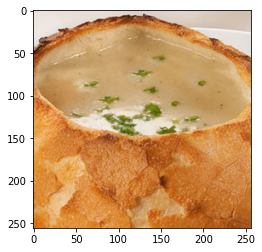

Average Red:  203.38169860839844
Average Green:  149.37655639648438
Average Blue:  92.03677368164062
Red Standard deviation: 24.13191616062594
Green Standard deviation: 36.79778879845973
Blue Standard deviation: 52.88160399196251


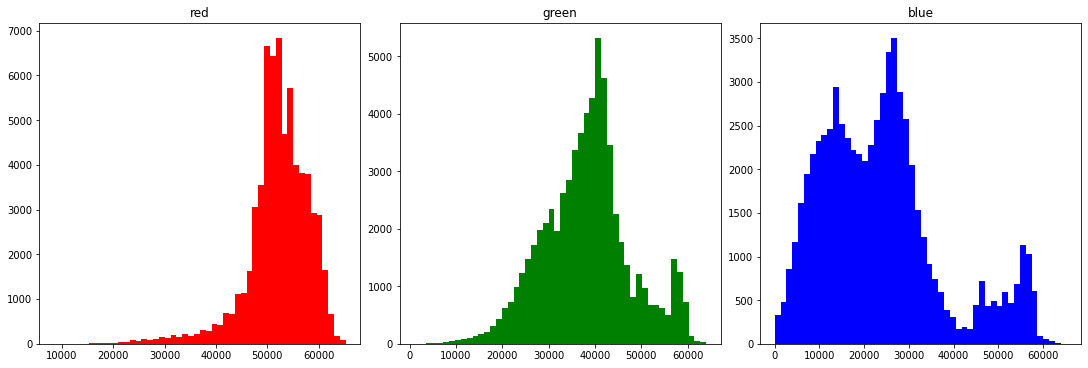

Standardized values

Red mean:  27.157958984375
Red deviation:  78.32256433878928

Green mean:  40.50115966796875
Green deviation:  92.91873768966471

Blue mean:  40.59968566894531
Blue deviation:  93.01653731401989


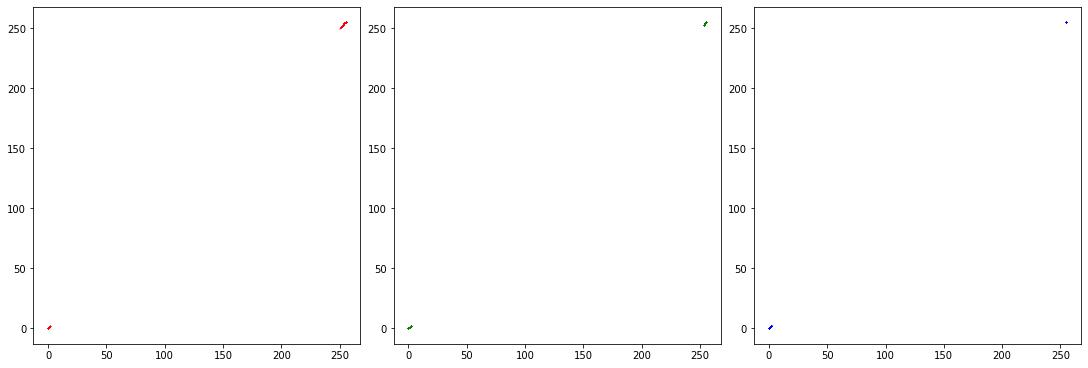

Image name:  images/5.jpg


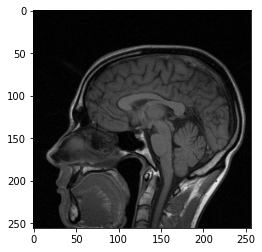

Average Red:  37.119415283203125
Average Green:  37.119415283203125
Average Blue:  37.119415283203125
Red Standard deviation: 37.35803724797901
Green Standard deviation: 37.35803724797901
Blue Standard deviation: 37.35803724797901


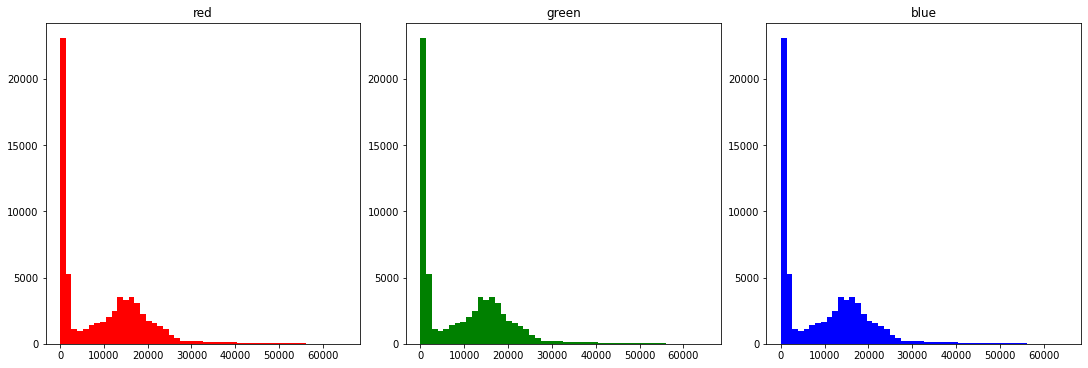

Standardized values

Red mean:  0.1986083984375
Red deviation:  0.5489207423789351

Green mean:  0.1986083984375
Green deviation:  0.5489207423789351

Blue mean:  0.1986083984375
Blue deviation:  0.5489207423789351


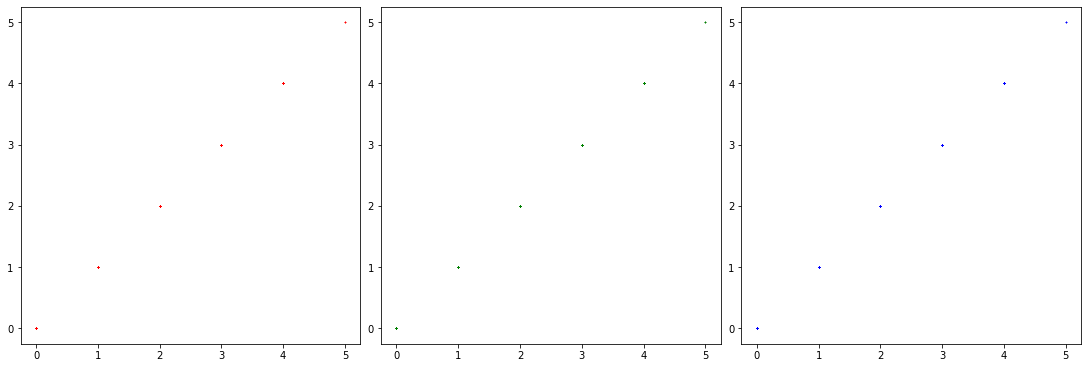

File name:  sounds/bird.wav


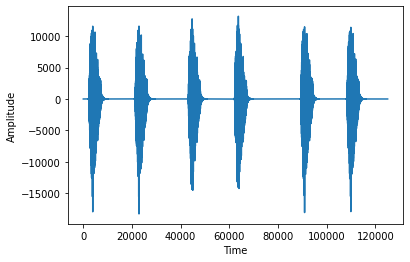

Before Standardization
Average:  0.0007836990595611285
Deviation:  1673.8290067837004


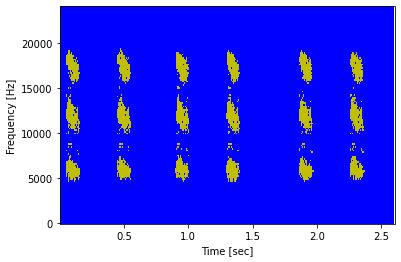

After Standardization
Average:  -2.3107080476817286e-18
Deviation:  0.9999999999999999


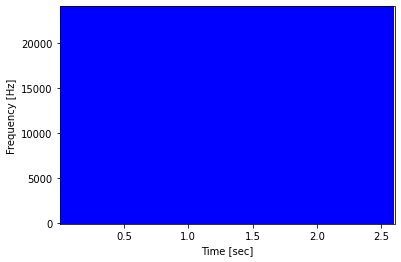

c:\users\yorick kramer\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\yorick kramer\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


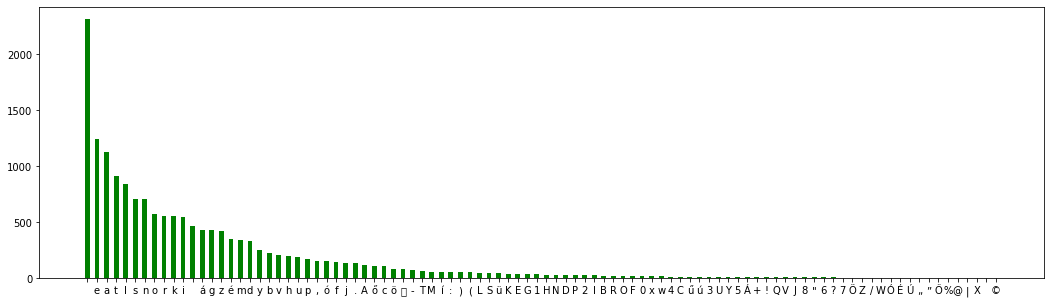





  

Deep Learning a gyakorlatban Python és LUA alapon - VITMAV45 | SmartLab, BME TMIT


















































Languages


Magyar

English







Menü be/kikapcsolás











                            RÓLUNK
                        

Laborunkról
Munkatársaink
Média megjelenések






                            MEGOLDÁSAINK
                        

Profivox magyar nyelvű felolvasó (korpuszos)
Profivox magyar nyelvű felolvasó (DNN)
Profivox magyar nyelvű felolvasó (HMM)
Profivox magyar nyelvű felolvasó (diádos,triádos)
StrokeAid

Alkalmazások

Jaws for Windows integráció
Időjárás mindenkinek (magyar, Windows 8)
AALFred (5 nyelven, Windows 8.1)
Robobraille
Beszélő ATM-ek

Gyógyszervonal (OGYI)

Árlista felolvasó (T-mobile)
Keleti pályaudvar bemondórendszere
Mindenség elmélete c. film gépi beszéd szinkron








                            K+F
                        


Kutatási projektek (folyamatban)
Kutatási projektek (befejezett)
Publikációk (összes)

In [6]:
processImage('images/1.jpg')
processImage('images/2.jpg')
processImage('images/3.jpg')
processImage('images/4.jpg')
processImage('images/5.jpg')
soundSpectogram('sounds/bird.wav')
ReadWeb("http://smartlab.tmit.bme.hu/oktatas-deep-learning")